**Set environment**

In [2]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


## Import data (ASTARR, track)

In [4]:
ASSAY  = "KS91_K562_ASTARRseq"
FOLDER = "coverage"

### set file path
fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "track.raw.Log2FC.GATA1.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

dat_track_astarr = dat
print(dim(dat))
head(dat)

[1] 2095150       8


Chrom,Start,End,Input,Output,FC,Log2FC,pLog2FC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47785501,47785502,0.008420745,0.009875188,1.172721,0.2298602,0.002079296
chrX,47785502,47785503,0.008420745,0.009875188,1.172721,0.2298602,0.002079296
chrX,47785503,47785504,0.008420745,0.009875188,1.172721,0.2298602,0.002079296
chrX,47785504,47785505,0.008420745,0.009875188,1.172721,0.2298602,0.002079296
chrX,47785505,47785506,0.008420745,0.009875188,1.172721,0.2298602,0.002079296
chrX,47785506,47785507,0.008420745,0.009875188,1.172721,0.2298602,0.002079296


## Import data

In [3]:
### set file path
fdiry = file.path(FD_RES, "region", "KS91_K562_ASTARRseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.peaks.MYC.FADS.GATA1.tsv"
fpath = file.path(fdiry, fname)

### import data
dat_region = read_tsv(fpath, show_col_types = FALSE)
peaks = dat_region$Peak

print(dim(dat_region))
head(dat_region)

[1] 417   5


Chrom,Start,End,Peak,Region
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr8,126778902,126779728,chr8_126778902_126779728,MYC
chr8,126782925,126783318,chr8_126782925_126783318,MYC
chr8,126804776,126805825,chr8_126804776_126805825,MYC
chr8,126817018,126817490,chr8_126817018_126817490,MYC
chr8,126820465,126821393,chr8_126820465_126821393,MYC
chr8,126824093,126824987,chr8_126824093_126824987,MYC


## Plot

In [5]:
CHROM = "chrX"
START = 48780000
END   = 48810000

In [6]:
dat_ant = dat_region %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)
head(dat_ant)

Chrom,Start,End,Peak,Region
<chr>,<dbl>,<dbl>,<chr>,<chr>
chrX,48782524,48783758,chrX_48782524_48783758,GATA1
chrX,48784956,48785503,chrX_48784956_48785503,GATA1
chrX,48785773,48786737,chrX_48785773_48786737,GATA1
chrX,48793902,48795694,chrX_48793902_48795694,GATA1
chrX,48800352,48802804,chrX_48800352_48802804,GATA1
chrX,48807974,48808435,chrX_48807974_48808435,GATA1


In [9]:
dat = dat_track_astarr
dat = dat %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)
head(dat)

Chrom,Start,End,Input,Output,FC,Log2FC,pLog2FC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,48780000,48780001,0.1960607,0.1572880,0.8022415,-0.3178915,-0.04754264
chrX,48780001,48780002,0.1839485,0.1228239,0.6677082,-0.5827104,-0.07647463
chrX,48780002,48780003,0.1851124,0.1241892,0.6708854,-0.5758618,-0.07613902
chrX,48780003,48780004,0.1809564,0.1155136,0.6383503,-0.6475798,-0.08224766
chrX,48780004,48780005,0.1809564,0.1155136,0.6383503,-0.6475798,-0.08224766
chrX,48780005,48780006,0.1809564,0.1141483,0.6308056,-0.6647327,-0.08401443


In [13]:
gp1 = ggplot() + geom_line(data=dat, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat, aes(x=Start, y=pLog2FC))

lst = list(gp1, gp2, gp3)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, color="grey50") +    
        geom_rect(
            data = dat_ant,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = "red",
            alpha=0.5) +
        labs(x="") +
        theme_cowplot()
    return(gpt)
})

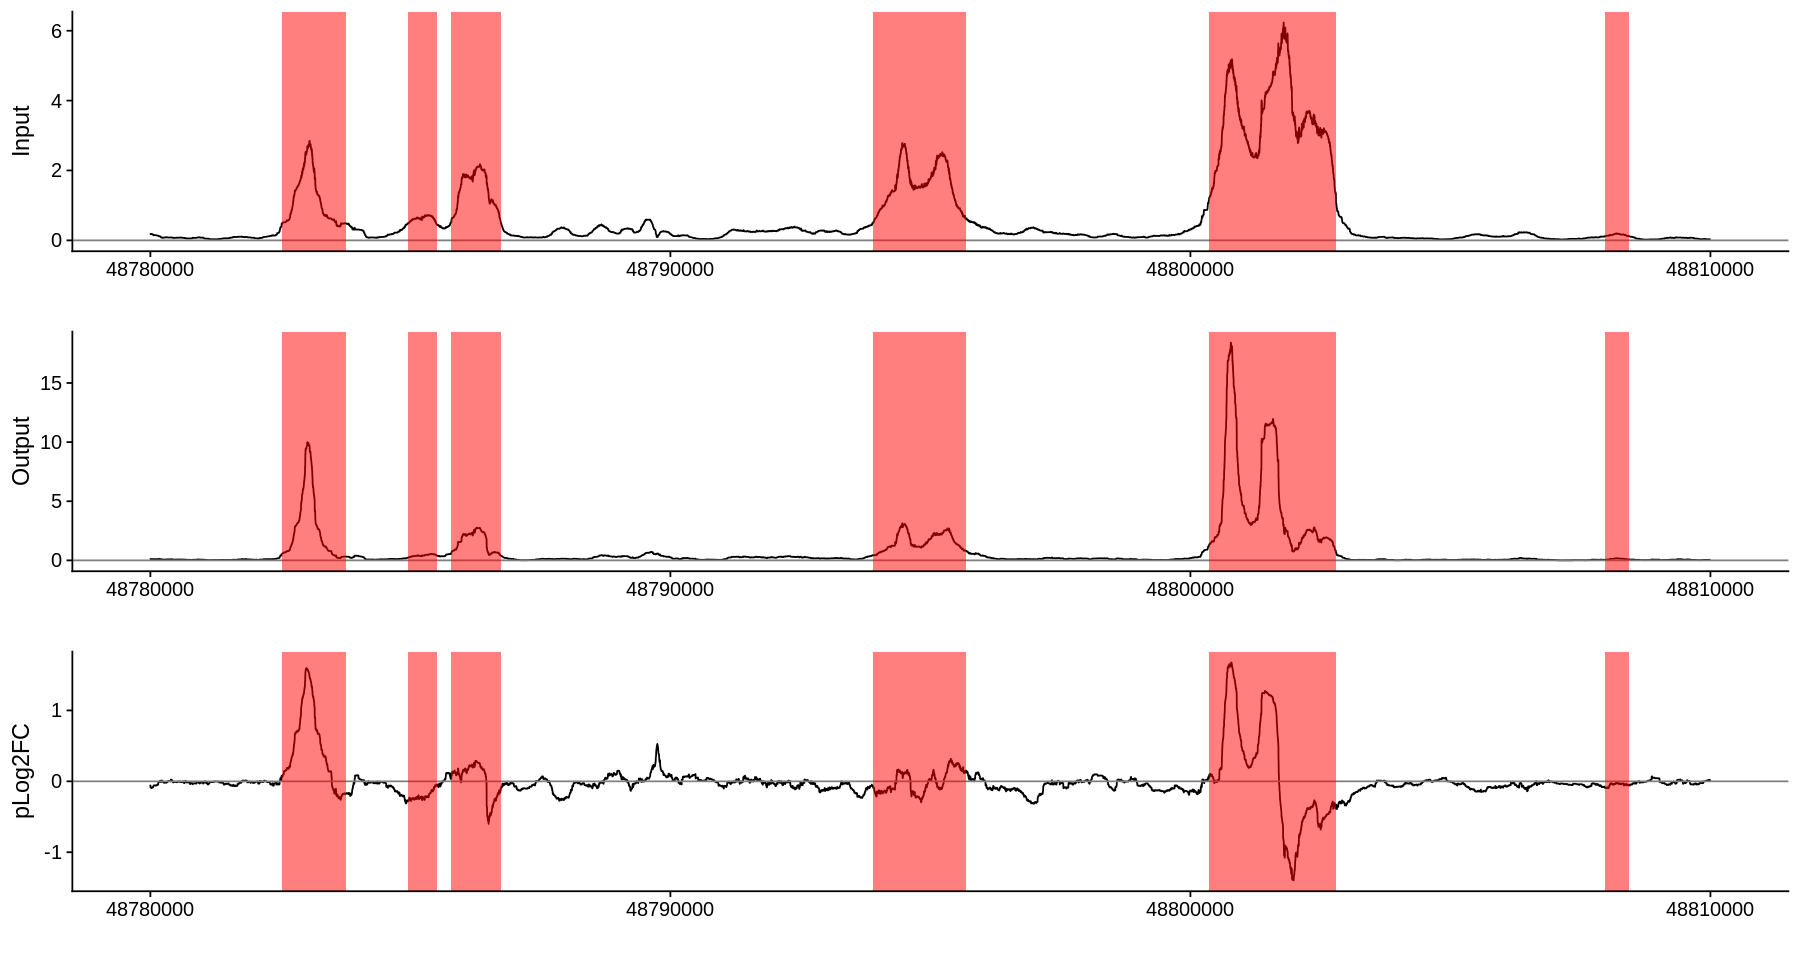

In [14]:
options(repr.plot.height=8, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)